In [1]:
from seq2seq.data.data_manager import Seq2SeqDataManager
from seq2seq.model.seq2seq_learner import Seq2seqLearner
import torch

In [ ]:
DEVICE = 'cpu'
MIN_LENGTH = 3
MAX_LENGTH = 10
MIN_COUNT = 3

## Get data
# data_manager=Seq2SeqDataManager.create_from_txt('data/eng-fra_sub.txt')
data_manager = Seq2SeqDataManager.create_from_txt('data/eng-fra_sub.txt','en', 'fr',
                                                  min_freq=MIN_COUNT, min_ntoks=MIN_LENGTH,
                                                  max_ntoks=MAX_LENGTH, switch_pair=True, device=DEVICE)

Encoder embedding vector didnt have 285 tokens, example ['!', 'je', 'suis', 'est', '?']
Decoder embedding vector didnt have 269 tokens, example ['i', 'it', '!', 'm', '?']
0:0:11.74 (1 50.0%) loss train: 4.295 loss valid: 3.445


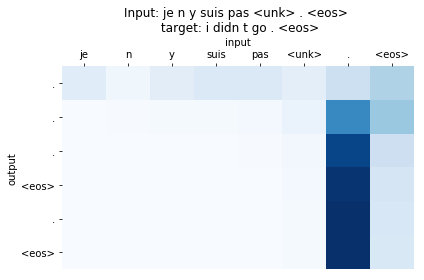

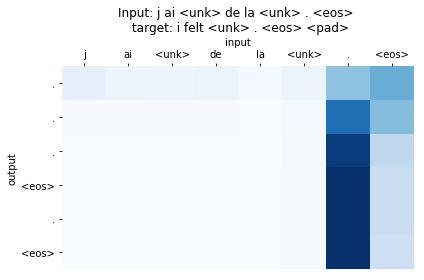

0:0:13.94 (2 100.0%) loss train: 3.215 loss valid: 3.265


In [4]:
hidden_size=50
learner=Seq2seqLearner(data_manager,hidden_size)
learner.fit(2, show_attention_every=5)

In [5]:
original_xtext = 'Je suis sûr.'
original_ytext = 'I am sure.'
predicted_text = learner.predict(original_xtext, device=DEVICE)
print(f'original text: {original_xtext}')
print(f'original answer: {original_ytext}')
print(f'predicted text: {predicted_text}')

original text: Je suis sûr.
original answer: I am sure.
predicted text: i i i . . <eos>


In [6]:
torch.save(learner,'sample_model.pth')

AttributeError: Can't pickle local object 'FeatureExtracter.<locals>.feature_extracter_fwd'

In [7]:
model = torch.load('sample_model.pth')

In [8]:
model.predict(original_xtext, device=DEVICE)

'i m m . <eos>'

In [7]:
import spacy

In [8]:
spacy.__version__

'2.0.16'